## Análisis de Datos de Temperatura
- Fecha: 2025-08-04
- Autor: Jhon Solorzano, Said Bravo
- Objetivo: Analisis de los datos recolectados a través del API de openweather y el registro de los mismos.

In [1]:
import os
import pandas as pd
os.listdir(os.getcwd())

['ObtenerClima.py',
 'weather-site',
 'utput.log',
 'LaPlataTemperatureAnalysis.ipynb',
 '.ipynb_checkpoints',
 'dublin_weather.csv',
 'output.log',
 'get_weather.sh']

### Lectura de Datos
Lectura del archivo csv con *with open*.

In [2]:
os.getcwd()

'/home/jhona/ArquiProyFinal'

In [10]:
import csv
print("Número de registros:")

csv_file = 'dublin_weather.csv'
filtered_rows = []
with open(csv_file, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row)==17:
            filtered_rows.append(row)
len(filtered_rows)

Número de registros:


493

In [17]:

print("El csv se compone de:")
header = filtered_rows[0]
data = filtered_rows[1:]
print("Columnas:",len(header),"y","Filas:", len(data))

El csv se compone de:
Columnas: 17 y Filas: 492


In [30]:
df = pd.read_csv('dublin_weather.csv')
df = pd.DataFrame(data, columns=header)
df.shape

(492, 17)

In [39]:
print(df.sample(4).sample(4, axis=1))  # 5 filas y 5 columnas aleatorias


    temperatura_actual            timestamp visibilidad humedad
233              16.42  2025-08-03 21:39:03       10000      86
142               15.6  2025-08-03 19:49:02       10000      83
126              15.73  2025-08-03 18:32:02       10000      84
72               15.59  2025-08-03 17:40:02       10000      86


### Análisis de Datos
- Se procede a realizar un plot de variables de interés según el tiempo capturado. La primera columna contiene la información del API sobre tiempo en formato **Timestamp**, misma que se puede convertir a **datetime**.
- Debido al proceso utilizado para guardar los datos `dt` tiene como tipo de dato objeto por lo que es necesario convertirlo a entero. De igual manera existen otras variables capturadas que en este caso por la lectura con `with open` se detectan como object en vez de sus tipos de datos correctos


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   timestamp           492 non-null    object
 1   ciudad              492 non-null    object
 2   pais                492 non-null    object
 3   temperatura_actual  492 non-null    object
 4   sensacion_termica   492 non-null    object
 5   temperatura_minima  492 non-null    object
 6   temperatura_maxima  492 non-null    object
 7   presion             492 non-null    object
 8   humedad             492 non-null    object
 9   descripcion_clima   492 non-null    object
 10  estado_clima        492 non-null    object
 11  velocidad_viento    492 non-null    object
 12  direccion_viento    492 non-null    object
 13  nubosidad           492 non-null    object
 14  visibilidad         492 non-null    object
 15  latitud             492 non-null    object
 16  longitud            492 no

In [69]:
df = pd.read_csv('dublin_weather.csv')

# Convertir columna timestamp a datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y-%m-%d %H:%M:%S", errors="coerce")

# Convertir columnas numéricas 
df["temperatura_actual"] = pd.to_numeric(df["temperatura_actual"], errors="coerce")
df["humedad"] = pd.to_numeric(df["humedad"], errors="coerce")

# se renombram las columnas
df = df.rename(columns={
    "timestamp": "Registrado el:",
    "temperatura_actual": "temperatura actual",
    "humedad": "Humedad registrada",
    "sensacion_termica": "Sensación"
})

# Mostrar tipos de datos y primeras filas
print(df.iloc[:5, :5])



       Registrado el:  ciudad pais  temperatura actual  Sensación
0 2025-08-03 15:52:42  Dublin   IE               16.64      16.45
1 2025-08-03 16:29:00  Dublin   IE               16.30      16.13
2 2025-08-03 16:30:00  Dublin   IE               16.30      16.13
3 2025-08-03 16:31:00  Dublin   IE               16.14      15.92
4 2025-08-03 16:32:02  Dublin   IE               16.14      15.92


### Presentación de Resultados

Se procede a realizar gráficas de interés para estudiar el comportamiento climatológico

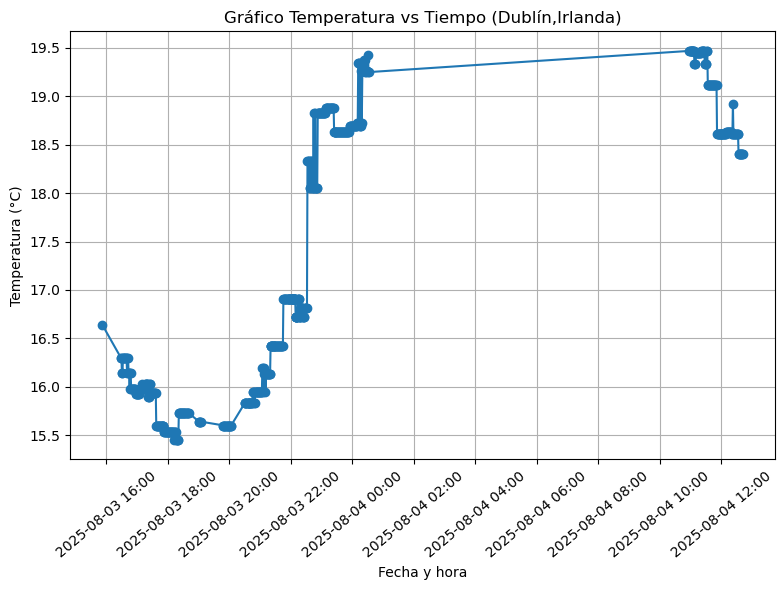

In [77]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

os.makedirs("images", exist_ok=True)

df = pd.read_csv('dublin_weather.csv')
df["timestamp"] = pd.to_datetime(df["timestamp"])

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df["timestamp"], df["temperatura_actual"], marker="o", linestyle="-")
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=40)
plt.grid()
plt.title("Gráfico Temperatura vs Tiempo (Dublín,Irlanda)")
plt.xlabel("Fecha y hora")
plt.ylabel("Temperatura (°C)")
fig.tight_layout()
plt.show()

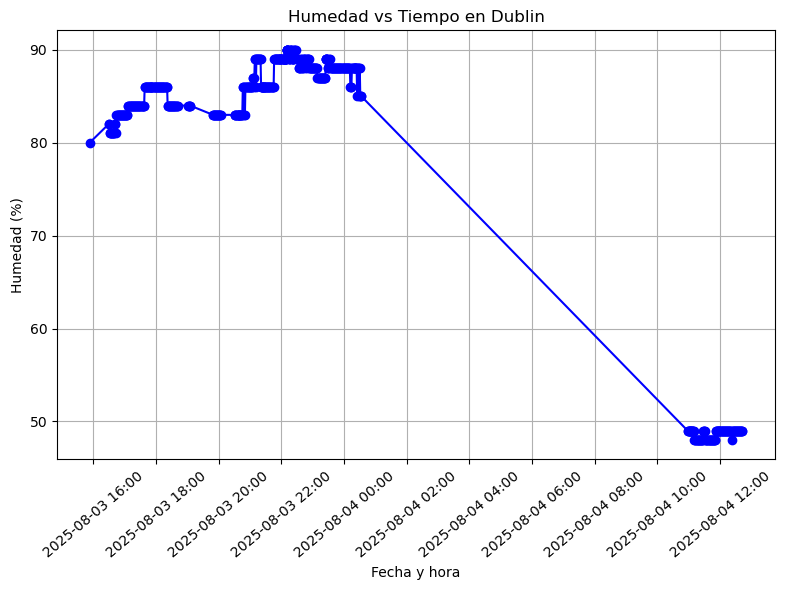

In [79]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

os.makedirs("images", exist_ok=True)
df = pd.read_csv('dublin_weather.csv')
df["timestamp"] = pd.to_datetime(df["timestamp"])

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df["timestamp"], df["humedad"], marker="o", linestyle="-", color="blue")
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=40)
plt.grid()
plt.title("Humedad vs Tiempo en Dublin")
plt.xlabel("Fecha y hora")
plt.ylabel("Humedad (%)")
fig.tight_layout()
plt.show()

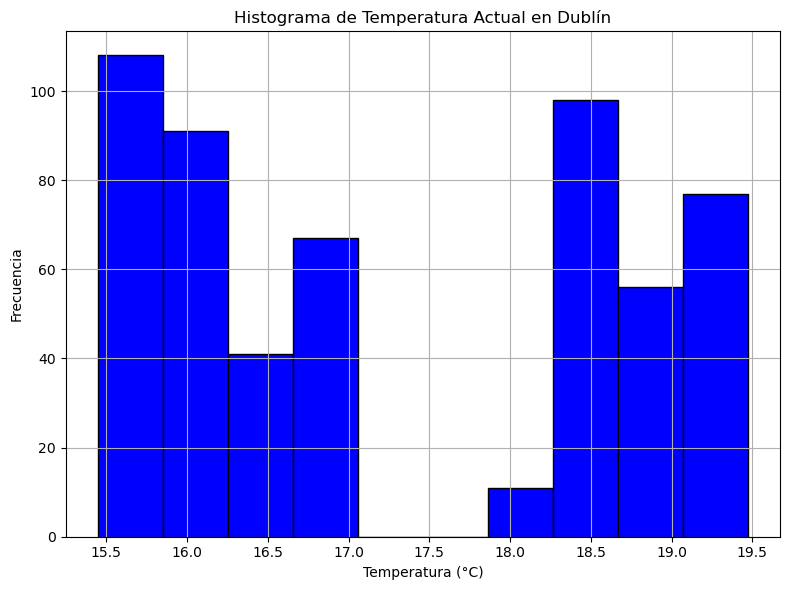

In [83]:
import matplotlib.pyplot as plt

os.makedirs("images", exist_ok=True)

df = pd.read_csv("dublin_weather.csv")
df["temperatura_actual"] = pd.to_numeric(df["temperatura_actual"], errors="coerce")
df = df.dropna(subset=["temperatura_actual"])

# creacion de histograma
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df["temperatura_actual"], bins=10, color="blue", edgecolor="black")

# configuracion de histograma
plt.grid(True)
plt.title("Histograma de Temperatura Actual en Dublín")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Frecuencia")
fig.tight_layout()
plt.show()